In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.neural_network import MLPClassifier

In [2]:
def make_plot(x, y_test, y_train, title = 'Title', x_label = 'x', y_label = 'y'):
    plt.figure()
    plt.scatter(x, y_test)
    plt.scatter(x, y_train)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(['Testing', 'Training'])
    plt.show()

In [3]:
def layers_tuple(layers, percep, mode = 'constant'):
    layer_list = []
    
    if mode == 'constant':
        for n in range(layers):
            layer_list.append(percep)
        layer_tuple = tuple(layer_list)
        
    elif mode == 'reduce':
        for n in range(layers):
            layer_list.append(percep - n*(percep-2)//(layers-1))
        layer_tuple = tuple(layer_list)
        
    return layer_tuple

In [4]:
heart = pd.read_csv("heart_attack.csv")
pd.set_option('display.max_columns', None)
heart

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [5]:
heart.pop('Patient ID')
heart.pop('Continent')
heart.pop('Hemisphere')

heart[['Systolic', 'Diastolic']]=heart['Blood Pressure'].str.split('/', expand = True)
heart.pop('Blood Pressure')

label_cols = ['Country']
heart[label_cols] = heart[label_cols].apply(LabelEncoder().fit_transform)

one_hot_sex = pd.get_dummies(heart['Sex'])
one_hot_diet = pd.get_dummies(heart['Diet'])
heart = pd.concat([heart, one_hot_sex, one_hot_diet], axis = 1)
heart.pop('Sex')
heart.pop('Diet')

pd.set_option('display.max_columns', None)
heart

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Systolic,Diastolic,Female,Male,Average,Healthy,Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0,0,158,88,False,True,True,False,False
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,3,0,165,93,False,True,False,False,True
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,6,0,174,99,True,False,False,True,False
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,3,0,163,100,False,True,True,False,False
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,16,0,91,88,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7,16,0,94,76,False,True,False,True,False
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9,3,0,157,102,True,False,False,True,False
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4,2,1,161,75,False,True,True,False,False
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8,2,0,119,67,False,True,False,False,True


<Axes: xlabel='Heart Attack Risk', ylabel='Count'>

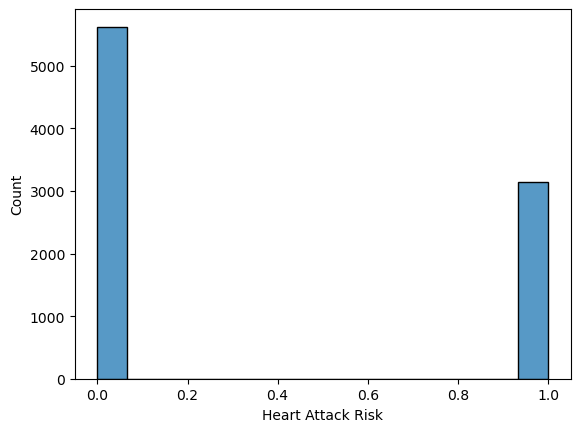

In [6]:
sns.histplot(data = heart['Heart Attack Risk'])

In [7]:
y = heart.pop('Heart Attack Risk')
X = heart

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 53, stratify=y)

<Axes: xlabel='Heart Attack Risk', ylabel='Count'>

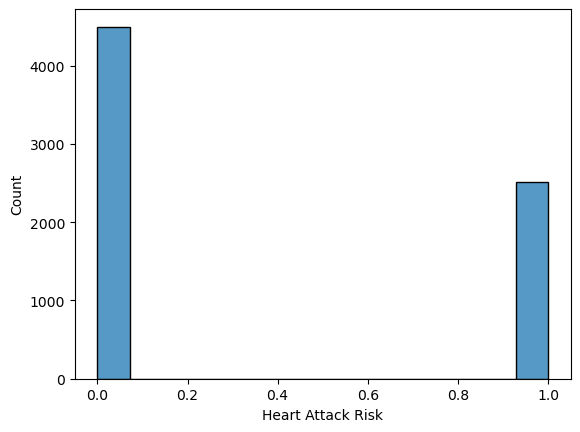

In [8]:
sns.histplot(data = y_train)

Done with layers: 10
Done with layers: 11
Done with layers: 12
Done with layers: 13
Done with layers: 14
Done with layers: 15
Done with layers: 16
Done with layers: 17
Done with layers: 18
Done with layers: 19
Done with layers: 20


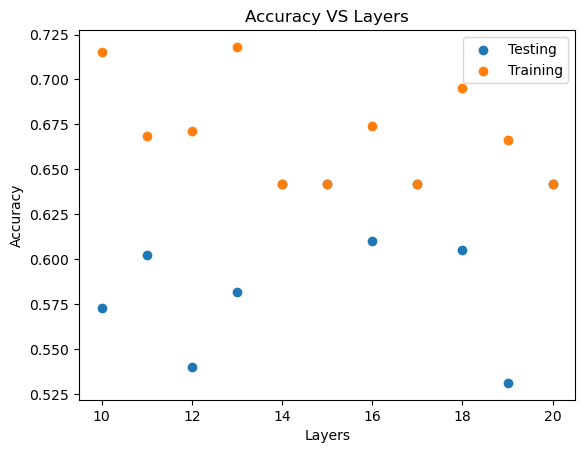

Best testing performance at 14 layers, 0.6417569880205363


In [9]:
test_scores = []
train_scores = []
n_values = []
for n in range(10,21):
    mlp = MLPClassifier(hidden_layer_sizes = layers_tuple(n,10), activation = 'relu', max_iter = 10000, random_state = 53)
    mlp.fit(X_train,y_train)
   
    y_pred_test = mlp.predict(X_test)
    test_scores.append(accuracy_score(y_pred_test,y_test))
   
    y_pred_train = mlp.predict(X_train)
    train_scores.append(accuracy_score(y_pred_train,y_train))
    
    n_values.append(n)
    print('Done with Layers:', n)

make_plot(x = n_values, y_test = test_scores, y_train = train_scores, title = 'Accuracy VS Layers', x_label = 'Layers', y_label = 'Accuracy')

print('Best Testing Performance at', n_values[test_scores.index(max(test_scores))], 'layers,', max(test_scores))

Done with perceptrons: 4
Done with perceptrons: 6
Done with perceptrons: 8
Done with perceptrons: 10
Done with perceptrons: 12
Done with perceptrons: 14
Done with perceptrons: 16
Done with perceptrons: 18
Done with perceptrons: 20
Done with perceptrons: 22


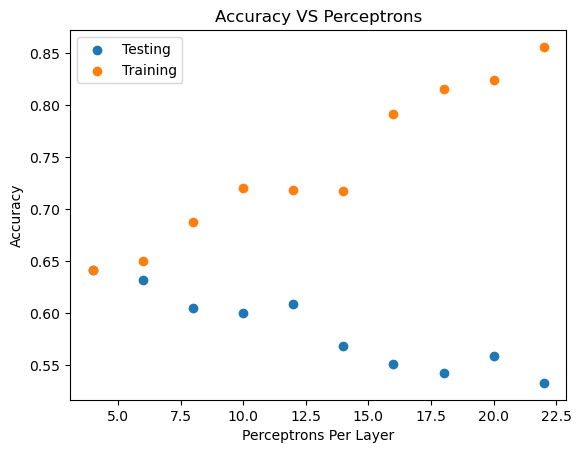

Best testing performance at 4 perceptrons per layer, 0.6417569880205363


In [10]:
test_scores = []
train_scores = []
n_values = []
for n in range(4,23,2):
    mlp = MLPClassifier(hidden_layer_sizes = layers_tuple(6,n), activation = 'relu', max_iter = 10000, random_state = 53)
    mlp.fit(X_train,y_train)
    
    y_pred_test = mlp.predict(X_test)
    test_scores.append(accuracy_score(y_pred_test,y_test))
    
    y_pred_train = mlp.predict(X_train)
    train_scores.append(accuracy_score(y_pred_train,y_train))
    
    n_values.append(n)
    print('Done with Perceptrons:', n)

make_plot(x = n_values, y_test = test_scores, y_train = train_scores, title = 'Accuracy VS Perceptrons', x_label = 'Perceptrons Per Layer', y_label = 'Accuracy')
print('Best Testing Performance at', n_values[test_scores.index(max(test_scores))], 'Perceptrons Per Layer,', max(test_scores))